In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Elliptic Integrals and the AGM ##

There is a fascinating connection between high precision elementary functions and the theory of elliptic integrals.  For more information take a look at [Borwein & Borwein  "The arithmetic-geometric mean and fast computation of elementary functions"; SIAM review 26, 351 (1984)](https://epubs.siam.org/doi/10.1137/1026073) or any one of several other nice articles online (e.g. the notes by Jameson, the book by Bowman or the articles by Newman).

### Elliptic integrals ###

We shall be interested here only in the complete [elliptic integrals](https://en.wikipedia.org/wiki/Elliptic_integral) of the first and second kind.  They show up in a lot of places, and can be very useful.  They are defined as
$$
  K(m) = \int_0^{\pi/2}\frac{d\theta}{\sqrt{1-m\sin^2\theta}}
$$
and
$$
  E(m) = \int_0^{\pi/2}\sqrt{1-m\sin^2\theta}\,d\theta
$$
The argument, $m$, is often written as $k^2$ and you would denote the function as e.g. $K(k)$.

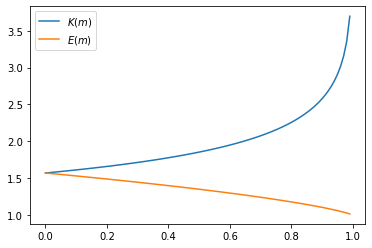

In [2]:
# Let's plot these, using the in-built SciPy routines:
from scipy.special import ellipk,ellipe
#
fig,ax = plt.subplots(1,1,figsize=(6,4))
m = np.linspace(0,1,100,endpoint=False)
ax.plot(m,ellipk(m),label=r'$K(m)$')
ax.plot(m,ellipe(m),label=r'$E(m)$')
ax.legend()
#

Of course we could alternatively evaluate these using direct quadratures.  The integrals are pretty well defined and the singularity in $K$ is reasonably weak.  However, we're interested in something deeper and more clever!  To see this let us introduce ...

### The arithmetic-geometric mean (AGM) ###

Define the "arithmetic-geometric mean" (AGM) of two positive numbers ($a>0$ and $b>0$) as the following iteration: starting from $a_0=a$ and $b_0=b$ iterate
$$
  a_{n+1} = \frac{1}{2}\left( a_n+b_n \right) \quad , \quad
  b_{n+1} = \sqrt{a_nb_n}
$$
It takes only a little work to show $a_n$ and $b_n$ converge to a common limit.  If $a>b$ then $a_n$ always decreases while $b_n$ always increases.  In fact the convergence is very fast.  Specifically $c_n=\sqrt{a_n^2-b_n^2}$ converges quadratically to zero as we now show.

First note
$$
  c_{n+1}^2 = a_{n+1}^2-b_{n+1}^2 = \frac{1}{4}\left(a_n+b_n\right)^2 - a_n b_n
  = \frac{1}{4}\left(a_n-b_n\right)^2
  \quad\Rightarrow\quad
  c_{n+1} = \frac{1}{2}\left(a_n-b_n\right)
$$
thus
$$
  c_n^2=(a_n+b_n)(a_n-b_n)=(2a_{n+1})(2c_{n+1})
  \quad\Rightarrow\quad
  c_{n+1} = \frac{c_n^2}{4a_{n+1}} \le \frac{c_n^2}{4b}
$$

As an aside, $c_n$ also allows us a way to "reverse" the AGM:
$$
  a_n = a_{n+1} + c_{n+1} \quad , \quad
  b_n = a_{n+1} - c_{n+1}
$$

Gauss was the first to provide a way to compute elementary functions using algorithms that converged extremely rapidly (Newton's method already does this for algebraic functions).  He did this by showing
$$
  I(a,b) \equiv \int_0^{\pi/2}\frac{d\theta}{\sqrt{a^2\cos^2\theta+b^2\sin^2\theta}}
  = \frac{\pi}{2{\rm AGM}(a,b)}
$$
The proof just involves finding a nice variable substitution to convert $I(a,b)$ into $I([a+b]/2,\sqrt{ab})$ and knowing $I(a,a)$.  Before we do that, let's note some properties of $I(a,b)$:

1. $I(a,b) = I(b,a)$.
2. $I(a,a) = \pi/(2a)$.
3. $I(ca,cb) = c^{-1}I(a,b)$.

all of which are easily proved.

It will prove useful to rewrite $I(a,b)$ in two other ways, that can be accomplished by "simple" variable substitutions.  First by putting $x=b\tan\theta$ we have
$$
  I(a,b) = \int_0^\infty\frac{dx}{\sqrt{(x^2+a^2)(x^2+b^2)}}
$$
and second by using $x=1/y$ we have
$$
  I(a,b) = \int_0^\infty\frac{dx}{\sqrt{(1+a^2x^2)(1+b^2x^2)}}
$$

### Connection with the AGM ###

Gauss was the first to note the connection of this integral to the AGM.  With the highly non-obvious variable transformation $y=(1/2)(x-ab/x)$ you can show
$$
  I(a,b) = I\left(\frac{a+b}{2},\sqrt{ab}\right)
$$
This means
$$
  I(a_0,b_0) = I(a_1,b_1) = \lim_{n\to\infty} I(a_n,b_n) = I(M,M) = \frac{\pi}{2M}
$$
where $M$ is the AGM.

### Connection with elliptic integrals ###

The integral $I(a,b)$ can be recast as the _complete elliptic integral of the first kind_, usually called $K$.  Trivially
$$
  K(b^2) = I(1,b)
$$
It turns out the integral can also be related to other special functions (and to the hypergeometric function), but that won't be of interest to us here.

### Connection with elementary functions ###

To make the connection with $\ln x$ and other elementary functions we need to consider $I(1,b)$ for small $b$.  As a first step we prove the non-obvious identity
$$
  \int_0^{\sqrt{ab}}\frac{dx}{\sqrt{(x^2+a^2)(x^2+b^2)}} =
  \int_{\sqrt{ab}}^\infty \frac{dx}{\sqrt{(x^2+a^2)(x^2+b^2)}}
$$
which actually follows quickly from the substitution $x=ab/y$.  This allows us to write
$$
  I(a,b) = 2 \int_0^{\sqrt{ab}} \frac{dx}{\sqrt{(x^2+a^2)(x^2+b^2)}}
$$
and now we can take $a=1$ and $b\to 0^{+}$.  Note for $b\ll 1$ the $x^2+a^2$ term is very close to $a^2=1$ so we have
$$
  I(1,b) \approx 2\int_0^{\sqrt{b}}\frac{dx}{\sqrt{x^2+b^2}}
  = 2 \sinh^{-1} b^{-1/2} \approx 2\ln\frac{2}{\sqrt{b}}
  = \ln\frac{4}{b}
  \quad\mathrm{as}\ b\to 0^{+}
$$

So for sufficiently large $b^{-1}$ we can compute $\ln 4b^{-1}$ using the AGM.  With a little rearranging and some careful attention to limits you can in fact show
$$
  \left| \ln(x) - \left[ I(1,10^{-n})-I(1,10^{-n}x)\right]\right| < n 10^{-2(n-1)}
$$
for $0<x<1$ and $n\ge 3$.  Thus we can compute $\ln x$ exponentially quickly given the AGM method for computing $I(a,b)$.  Similar tricks give $\exp(x)$ and hence $\sin x$, $\cos x$, $\sinh x$, $\cosh x$, etc.

As an example let us compute $\ln x$ (for $x>1$) using the AGM.

Since $I(1,b)\approx\ln 4/b$ for $b\to 0^{+}$ we have $aI(a,1)\approx\ln 4a$ for $a\to\infty$.  To proceed, let us choose a large $n$ and write $4a=x^n$ which should be $\gg 1$.  Then we have
$$
  I(a,1) = \frac{\pi}{2} / {\rm AGM}(a,1)
  \quad\Rightarrow\quad
  \ln x \approx \frac{a}{n} I(a,1) = \frac{a}{n}\frac{\pi/2}{{\rm AGM}(a,1)}
$$

In [3]:
# Compute ln(2) using the AGM.  We will use the "mpmath" library
# to do very high precision arithmetic, to show the convergence.
from mpmath import mp
mp.dps = 25
# Compute ln(2) using the AGM.
# Choose n=16, so that a = (1/4)2^16 = 2^14 = 16384.
aa,enn= mp.mpf(16384.),mp.mpf(16.0)
an,bn = mp.mpf(16384.),mp.mpf(1.00)
for i in range(7):
    an,bn = 0.5*(an+bn),mp.sqrt(an*bn)
    approx= aa/enn * mp.pi/2/an
    print("Apprx=",approx)
print("ln(2)=",mp.log(2.0))
print("Error=",mp.log(2.0)-approx)
print("Fractional error should be of order ",mp.mpf(4.0)/2.0**(2*enn))

Apprx= 0.1963375573558711184733443
Apprx= 0.3866343221291927499772546
Apprx= 0.6205278460870212204200192
Apprx= 0.6909089259639392859153996
Apprx= 0.6931453654660913415488173
Apprx= 0.6931471811460922292996248
Apprx= 0.6931471811472812665007319
ln(2)= 0.6931471805599453094172321
Error= -5.873359570834997955093773e-10
Fractional error should be of order  9.31322574615478515625e-10


So we get part-per-billion accuracy in around 7 steps, just by averaging and taking square roots!

### Elliptic functions ###

So we know how to compute $K(m)$ using the AGM.  With a little bit of extra work you can "hack" the AGM iteration to compute $E(m)$ as well.  Then there are numerous identities which can help you get the third elliptic integral.  To complete the story, below is a function which computes $K$ and $E$:

In [4]:
def elliptic_agm(m):
    """   
    Uses the arithmetic-geometric mean (AGM) to compute the (complete)
    elliptic integrals of the first (K) and second (E) kind for argument m
    (which is sometimes denoted k^2).
    """
    a = 0.5+0.5*np.sqrt(1-m)
    c = m/(4*a)
    t = np.log(c/(4*a))
    s = a**2
    f = 1.0
    while c>1e-10:
        v = (a+np.sqrt((a-c)*(a+c)))/2.0
        t = t + np.log(a/v)/f
        a = v
        c = c**2/(4*a)
        f = 2*f
        s = s - f*c**2
    ellipK = np.pi/(2*a)
    ellipE = ellipK * s
    return( (ellipK,ellipE) )
    #

In [5]:
myK,myE     = elliptic_agm(0.9)
trueK,trueE = ellipk(0.9),ellipe(0.9)
print("My K=",myK,", trueK=",trueK,", rel.err.=",100*(myK/trueK-1),"%")
print("My E=",myE,", trueE=",trueE,", rel.err.=",100*(myE/trueE-1),"%")

My K= 2.578092113348172 , trueK= 2.5780921133481733 , rel.err.= -5.551115123125783e-14 %
My E= 1.104774732704073 , trueE= 1.1047747327040733 , rel.err.= -4.440892098500626e-14 %


### Calculation of Pi using the Brent-Salamin Algorithm ###

Let me end with a calculation of $\pi$ using the Brent-Salamin algorithm (or the Gauss-Brent-Salamin algorithm, to be fair).

The method for $\pi$ is:
1. Set $\alpha_0=\sqrt{2}$, $\beta_0=0$ and $\pi_0=2+\sqrt{2}$.
2. Iterate
   * $\alpha_{n+1} = \frac{1}{2}\left(\alpha_n^{1/2}+\alpha_n^{-1/2}\right)$
   * $\beta_{n+1} = \alpha_n^{1/2}\left(\frac{\beta_n+1}{\beta_n+\alpha_n}\right)$
   * $\pi_{n+1} = \pi_n\beta_{n+1}\left(\frac{1+\alpha_{n+1}}{1+\beta_{n+1}}\right)$

with $\pi_n\to\pi$ as $n\to\infty$.

In [6]:
# Compute Pi to a ridiculous number of digits.
from mpmath import mp
mp.dps = 50
#
one   = mp.mpf(1.0)
half  = mp.mpf(0.5)
alpha = mp.sqrt(mp.mpf(2.0))
beta  = mp.mpf(0.0)
pi    = mp.mpf(2.0) + alpha
#
for iter in range(6):
    aa    = alpha
    rtalp = mp.sqrt(alpha)
    alpha = half*(rtalp+one/rtalp)
    beta  = rtalp*(one+beta)/(aa+beta)
    pi    = pi*beta*(one+alpha)/(one+beta)
    print(pi)

3.1426067539416226007907198236183018919713562462772
3.1415926609660442304977522351203396906792842568645
3.1415926535897932386457739917571417940347896238675
3.1415926535897932384626433832795028841972241204666
3.1415926535897932384626433832795028841971693993751
3.1415926535897932384626433832795028841971693993751
